# Lección 2: La esfera de Bloch

Con este ejemplo exploraremos un poco más sobre la representación gráfica de los estados cuánticos de un qubit. Veremos que la condición de normalización de un estado implica que podemos representarlo por medio de un vector en la denominada **esfera de Bloch**. Posteriormente, consideraremos con un poco más de detalle las propiedades de los operadores de Pauli. Finalmente, trataremos con rigor la definición de los operadores unitarios como rotaciones, y veremos tanto analítica como gráficamente su efecto al actuar sobre un vector de estado.

**SUPRE IMPORTANTE:** En este ejemplo intentaremos presentar al lector el formalismo necesario para estudiar la computación cuántica en forma teórica, así como una posible intuición física sobre la misma. Esta sesióne stá disponible en nuestro servidor de MyBinder.

<p align="center">
  <a href="https://mybinder.org/v2/gh/QC-FEM/QC-CrashCourse/HEAD">
    <img src="https://mybinder.org/badge_logo.svg">
  </a>
</p>

In [11]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np
backend_ = Aer.get_backend('statevector_simulator')

## Vectores de estado en la esfera de Bloch

En la lección 2 hemos visto que los estados de un qubit pueden representarse como vectores en un espacio lineal complejo de dos dimensiones (un espacio de Hilbert para ser más precisos). En particular, tomamos dos **estados ortogonales** como nuestra base

$$|0\rangle \equiv \begin{bmatrix}1 \\ 0\end{bmatrix}$$

$$|1\rangle \equiv \begin{bmatrix}0 \\ 1\end{bmatrix}$$

De modo que todo vector de estado de un qubit puede representarse como una **combinación lineal** de la forma

$$|\psi\rangle = \alpha |0\rangle + \beta|1\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$$

Imponiendo la condición de normalización

$$|\alpha|^2 + |\beta|^2 = 1$$

Como hemos visto, la normalización del vector de estado es fundamental debido a la interpretación probabilística que tienen estos coeficientes. Esta nos capacita para sustituir los parámetros complejos $\alpha$ y $\beta$, por parámetros reales $\theta$ y $\phi$ tales que cualquier estado de un qubit pueda representarse de la forma

$$|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Invitamos al lector a convencerse de este hecho matemático. Podemos entonces realizar un mapeo uno a uno entre los vectores en un espacio real tridimensional

$$\hat{n} = \sin{\theta}\cos{\phi}\mathrm{\mathbf{x}} + \sin{\theta}\sin{\phi}\mathrm{\mathbf{y}} + \cos{\theta}\mathrm{\mathbf{z}}$$

Y los estados de un qubit. Para unos valores de $\theta$ y $\phi$ dados, módulo $2\pi$, tenderemos un vector de estado y un vector sobre la *esfera unitaria tridimensional*. Esta esfera la denominaremos **esfera de Bloch**, y la utilizaremos para representar el estado de un qubit.

> En la esfera de Bloch es una esfera de radio unitario, cuyos radios vectores desde el centro a la superficie representan todos los posibles estados de un qubit.

Procederemos a visualizar la esfera de Bloch por medio de la función ```plot_bloch_multivector``` de Qiskit. Vamos a considerar el estado de un qubit

$$|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Invitamos al lector a comprobar que este estado corresponde a $\phi = 0$, $\theta = \pi/2$. Iniciamos un par de variables con estos valores

In [2]:
theta = np.pi/2
phi = 0

Ahora procederemos a definir un ```ndarray``` que representará el vector de estado. 

In [3]:
estado = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])

Y a visualizarlo por medio de Qiskit

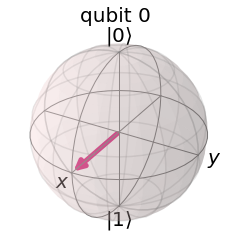

In [4]:
plot_bloch_multivector(estado)

Observamos que la representación del vector de estado en la esfera de Bloch es un vector unitario apuntando en dirección $x$ positiva. Además, los vectores de la base ortogonal que hemos escogido para nuestro espacio (denominada base computacional), corresponden a direcciones opuestas sobre el eje $z$. El qubit 0 está en el estado $|0\rangle$, mientras que el qubit 1 se encuentra en el estado $|1\rangle$

**SUPER IMPORTANTE:** Recordamos que el estado de un sistema de vario qubits está descrito por el **producto de Kroenecker** de los estados de cada subsistema, en el caso de estados no entrelazados. Para generar un estado de dos qubits 

$$|1\rangle_1 \otimes |0\rangle_0$$

Utilizamos la función de numpy ```numpy.kron```. La convención de inicialización es que el estado de más a la derecha en un producto de Kroenecker (producto directo), corresponde el qubit 0. Esto es consistente con la forma como uno escribiría una cadena binaria en un papel.

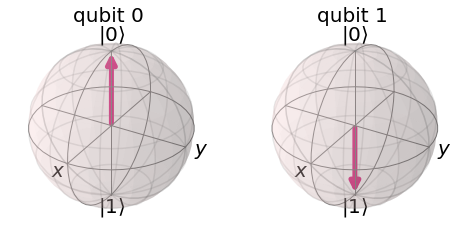

In [5]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([0,1],[1,0])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

Debido a su importancia, consideraremos otros conjuntos de vectores de estado que se representan como vectores sobre los ejes cartesianos de la esfera de Bloch

### Estados sobre el eje $x$

A partir de la convención que hemos manejado, estos corresponden a los estados

$$|+\rangle = \frac{1}{2}(|0\rangle + |1\rangle)$$

$$|-\rangle = \frac{1}{2}(|0\rangle - |1\rangle)$$

Como veremos en lecciones posteriores, realizar una medición en esta base es fundamental para muchos protocolos cuánticos. A continuación presentamos una representación gráfica de estos estados en la esfera de Bloch. El qubit 0 se encuentra en el estado $|+\rangle$, mientras que el qubit se encuentra en el estado $|-\rangle$.

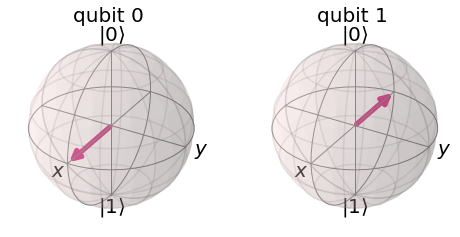

In [6]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([np.sqrt(1/2),-np.sqrt(1/2)],[np.sqrt(1/2),np.sqrt(1/2)])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

### Estados sobre el eje $y$

A partir de la convención que hemos manejado, estos corresponden a los estados

$$|+\mathrm{i}\rangle = \frac{1}{2}(|0\rangle + \mathrm{i} |1\rangle)$$

$$|-\mathrm{i}\rangle = \frac{1}{2}(|0\rangle - \mathrm{i} |1\rangle)$$

A continuación presentamos una representación gráfica de estos estados en la esfera de Bloch. El qubit 0 se encuentra en el estado $|+\mathrm{i}\rangle$, mientras que el qubit 1 se encuentra en el estado $|-\mathrm{i}\rangle$.

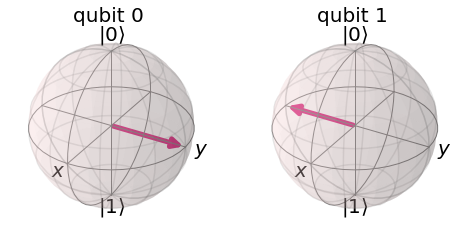

In [7]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([np.sqrt(1/2),-1j*np.sqrt(1/2)],[np.sqrt(1/2),1j*np.sqrt(1/2)])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

## Operadores unitarios como rotaciones

Con la representación de Bloch, podremos describir todas las compuertas cuánticas como rotaciones del vector de Bloch de un estado de un qubit. Para ilustrar este hecho, consideraremos los operadores de Pauli: $\hat{X}$, $\hat{Y}$, $\hat{Z}$; y su acción sobre un vector de estado de un qubit. A partir de ellos, definiremos las rotaciones sobre un eje en la esfera de Bloch. Posteriormente, consideraremos la forma matemática de un operador unitario general, y veremos que coincide con la de un operador de rotación. Finalmente, consideraremos como ejemplos importantes las compuertas de Hadamard, Fase y T.

**IMPORTANTE:** El operador identidad, que denotaremos $\hat{I}$, no realiza ninguna trnasformación sobre un qubit, y corresponde a la matriz

$$\hat{I} = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$$

### Operadores de Pauli

Como es conocido a partir de la lección teórica, los sistemas cuánticos cerrados evolucionan por medio de **operadores unitarios**. En este curso idealizaremos los sistemas de uno o más qubits como sistemas cerrados.

> En computación cuántica, una compuerta realiza evolución temporal unitaria de un estado de varios qubits. Recordamos que los operadores unitarios satisfacen la relación
> $$\hat{U}\hat{U}^{\dagger} = \hat{U}^{\dagger}\hat{U} = \hat{I}$$
> Donde $\hat{I}$ es el operador identidad del sistema.

En una base particular, que corresponde a dos estados mutuamente excluyentes, las compuertas de un qubit se representan con **matrices $2 \times 2$**. La acción de una compuerta sobre el estado de un qubit se representa por medio de un **producto matricial**. Los operadores fundamentales de un qubit son

$$\hat{X} = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$$

$$\hat{Y} = \begin{bmatrix}0 & -\mathrm{i} \\ \mathrm{i} & 0\end{bmatrix}$$

$$\hat{Z} = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$$

Estos son denominados **operadores de Pauli**. Vamos a estudiar la acción de cada uno de estos operadores en la esfera de Bloch. Puesto que trabajamos en un espacio lineal, esto es suficiente para especificar la acción sobre cualquier estado de un qubit.

#### Operador $\hat{X}$

Como es de esperar, el operador $\hat{X}$ es el análogo cuántico de la compuerta NOT clásica:

$$\hat{X}|0\rangle = |1\rangle$$
$$\hat{X}|1\rangle = |0\rangle$$

Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

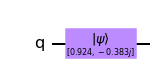

In [24]:
## Parametros vector de Bloch
theta = np.pi/4
phi = 3*np.pi/2
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoX = QuantumCircuit(1)
## Cargamos el estado inicial
demoX.initialize(psi_i,0)
## Dibujamos el circuito
demoX.draw(output='mpl')

Ahora incluimos una compuerta $\hat{X}$ de Pauli y simulamos el circuito

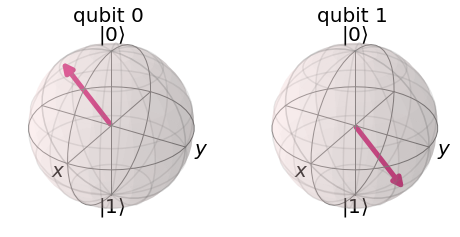

In [25]:
## Inlcuimos X de Pauli
demoX.x(0)
## Simulamos el circuito
simulacion = execute(demoX,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{X}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{x}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

#### Operador $\hat{Y}$

El operador $\hat{Y}$ de Pauli tiene una acción similar a la compuerta NOT clásica:

$$\hat{X}|0\rangle = -\mathrm{i}|1\rangle$$
$$\hat{X}|1\rangle = \mathrm{i}|0\rangle$$

Pero agregando una fase adicional de $\pi/2$. Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

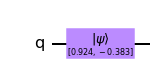

In [27]:
## Parametros vector de Bloch
theta = np.pi/4
phi = np.pi
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoY = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoY.initialize(psi_i,0)
## DYbujamos el circuito
demoY.draw(output='mpl')

Ahora incluimos una compuerta $\hat{Y}$ de Pauli y simulamos el circuito

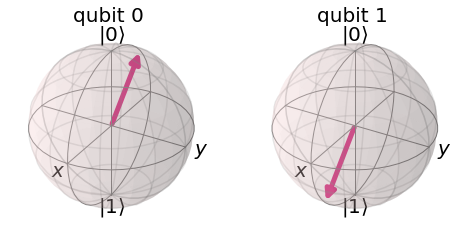

In [28]:
## Inlcuimos Y de Pauli
demoY.y(0)
## Simulamos el circuito
simulacion = execute(demoY,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{Y}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{y}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

#### Operador $\hat{Z}$

A partir de la definición de producto matricial, notamos que:

$$\hat{X}|0\rangle = |0\rangle$$
$$\hat{X}|1\rangle = -|1\rangle$$

Diremos que la base computacional es la **base de autoestados** del operador $\hat{Z}$ de Pauli, pues los deja invariantes salvo una fase relativa de $\pi/4$. Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

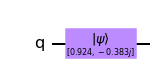

In [33]:
## Parametros vector de Bloch
theta = np.pi/4
phi = -np.pi/2
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoZ = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoZ.initialize(psi_i,0)
## DYbujamos el circuito
demoZ.draw(output='mpl')

Ahora incluimos una compuerta $\hat{Y}$ de Pauli y simulamos el circuito

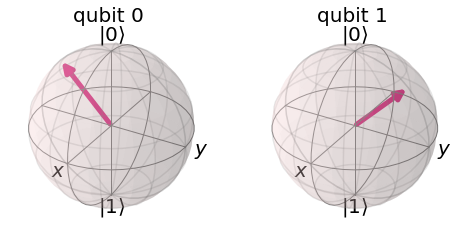

In [34]:
## Inlcuimos Y de Pauli
demoZ.z(0)
## Simulamos el circuito
simulacion = execute(demoZ,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{Z}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{z}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

### Operadores de Pauli como base

Por los postulados de la mecánica cuántica, las compuertas de un qubit pueden representarse por medio de matrices, que a su vez conforman un espacio lineal. Esto significa que existe un conjunto de **operadores base**, $\{\hat{O}_1, \hat{O}_2, \hat{O}_3, \hat{0}_4\}$, tales que todo operador puede representarse de la forma

$$\hat{U} = \sum_{i=1}^{4} \gamma_i \hat{O}_i$$

Invitamos al lector a demostrar que el conjunto $\{\hat{I},\hat{X},\hat{Y},\hat{Z}\}$ es una base para el espacio de operadores de un qubit. Por tanto, cualquier compuerta que actúe sobre un qubit puede representarse de la forma

$$\hat{U} = \gamma_0 \hat{I} + \gamma_x \hat{X} + \gamma_y \hat{Y} + \gamma_z \hat{Z}$$

Realizaremos la definición

$$\vec{\gamma} \cdot \sigma = \gamma_x \hat{X} + \gamma_y \hat{Y} + \gamma_z \hat{Z}$$

De modo que cualquier compuerta de un qubit puede representarse como una combinación lineal

$$\hat{U} = \gamma_0 \hat{I} + \vec{\gamma} \cdot \sigma$$

Nuestra tarea consistirá en demostrar que la condición de unitaridad de las compuertas cuánticas implica que estas pueden visualizarse como rotaciones alrededor de un eje particular de la esfera de Bloch. Al finalizar, consideraremos 3 compuertas importantes para la computación cuántica: Hadamard, compuerta S y compuerta T.

#### Rotaciones generales en la esfera de Bloch



#### Demostración matemática

Invitamos al lector a convencerse de que

$$(\vec{a} \cdot \sigma) (\vec{b} \cdot \sigma) = (\vec{a} \cdot \vec{b}) \hat{I} + (\vec{a} \times \vec{b}) \cdot \sigma$$

Puesto que

$$\hat{U}^{\dagger} = \gamma_0^{*} \hat{I} + \vec{\gamma}^{*} \cdot \sigma$$

Obtenemos la expresión para el producto $\hat{U}^{\dagger}\hat{U}$

$$\hat{U}^{\dagger}\hat{U} = (|\gamma_0|^2 + |\gamma|^2)\hat{I} + 2 \text{Re}(\gamma_0 \vec{\gamma}) \cdot \sigma + \mathrm{i}(\vec{\gamma}^{*} \times \vec{\gamma}) \cdot \sigma$$

Puesto que $\hat{U}$ es un operador unitario, debe ser que

$$|\gamma_0|^2 + |\gamma|^2 = 1$$

Por tanto, podemos definir

$$\gamma_0 = \mathrm{e}^{\mathrm{i}\delta}\cos{\frac{\theta}{2}}$$

$$|\gamma| = \sin{\frac{\theta}{2}}$$

De modo que

$$\vec{\gamma} = \sin{\frac{\theta}{2}} \hat{m}$$

Donde $\hat{m}$ es un vector unitario, complejo en general. Invitamos al lector a convencerse que la condición

$$2 \text{Re}(\gamma_0 \vec{\gamma}) = - \mathrm{i} \vec{\gamma}^{*} \times \vec{\gamma}$$

Necesaria para que el operador $\hat{U}$ sea unitario, implica que

$$\hat{m} = \mathrm{e}^{\mathrm{i}\epsilon}\hat{n}$$

Siendo $\hat{n}$ un *vector unitario real*.

> Por tanto, cualquier compuerta cuántica actuando sobre un qubit puede representarse por una combinación de la forma
>
> $$\hat{U} = \mathrm{e}^{\mathrm{i}\alpha}(\cos{\frac{\theta}{2}}\hat{I} + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}}\hat{n} \cdot \sigma)$$
>
> Para ciertos valores de los parámetros *reales* $\alpha$, $\gamma$, $\theta$, $\phi$